In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib 
%matplotlib inline 

In [20]:
from plotly import tools
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [29]:
from collections import OrderedDict

In [19]:
py.tools.set_credentials_file(username='tomleeosborn', api_key='gkYGrvCzKnqlv7RTvQg1')

In [3]:
df = pd.read_csv('LoanStats3a.csv', low_memory=False)

In [4]:
df.shape

(42542, 145)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.addr_state

0         AZ
1         GA
2         IL
3         CA
4         OR
5         AZ
6         NC
7         CA
8         CA
9         TX
10        AZ
11        CA
12        VA
13        IL
14        CA
15        MO
16        CA
17        CT
18        UT
19        CA
20        TX
21        FL
22        TX
23        CA
24        CA
25        IL
26        NY
27        PA
28        FL
29        MN
        ... 
42512     FL
42513     GA
42514     CT
42515     CT
42516     NJ
42517     TX
42518     NJ
42519     MO
42520     NJ
42521     LA
42522     OH
42523     NJ
42524     CO
42525     NY
42526     MA
42527     GA
42528     CT
42529     KS
42530     MA
42531     FL
42532     CT
42533     NY
42534     MA
42535     NY
42536     NY
42537     CT
42538    NaN
42539    NaN
42540    NaN
42541    NaN
Name: addr_state, Length: 42542, dtype: object

In [6]:
interested_columns = ['term',
             'grade',
             'emp_length',
             'verification_status',
             'loan_status',
             'pymnt_plan',
             'purpose',
             'home_ownership']

In [12]:
df[interested_columns].astype(object)

,term,grade,emp_length,verification_status,loan_status,pymnt_plan,purpose,home_ownership
0,36 months,B,10+ years,Verified,Fully Paid,n,credit_card,RENT
1,60 months,C,< 1 year,Source Verified,Charged Off,n,car,RENT
2,36 months,C,10+ years,Not Verified,Fully Paid,n,small_business,RENT
3,36 months,C,10+ years,Source Verified,Fully Paid,n,other,RENT
4,60 months,B,1 year,Source Verified,Fully Paid,n,other,RENT
5,36 months,A,3 years,Source Verified,Fully Paid,n,wedding,RENT
6,60 months,C,8 years,Not Verified,Fully Paid,n,debt_consolidation,RENT
7,36 months,E,9 years,Source Verified,Fully Paid,n,car,RENT
8,60 months,F,4 years,Source Verified,Charged Off,n,small_business,OWN
9,60 months,B,< 1 year,Verified,Charged Off,n,other,RENT


In [15]:
df[interested_columns].dtypes

term                   object
grade                  object
emp_length             object
verification_status    object
loan_status            object
pymnt_plan             object
purpose                object
home_ownership         object
dtype: object

Default Amount Based on Credit

In [ ]:
group = df.groupby('loan_status').mean()

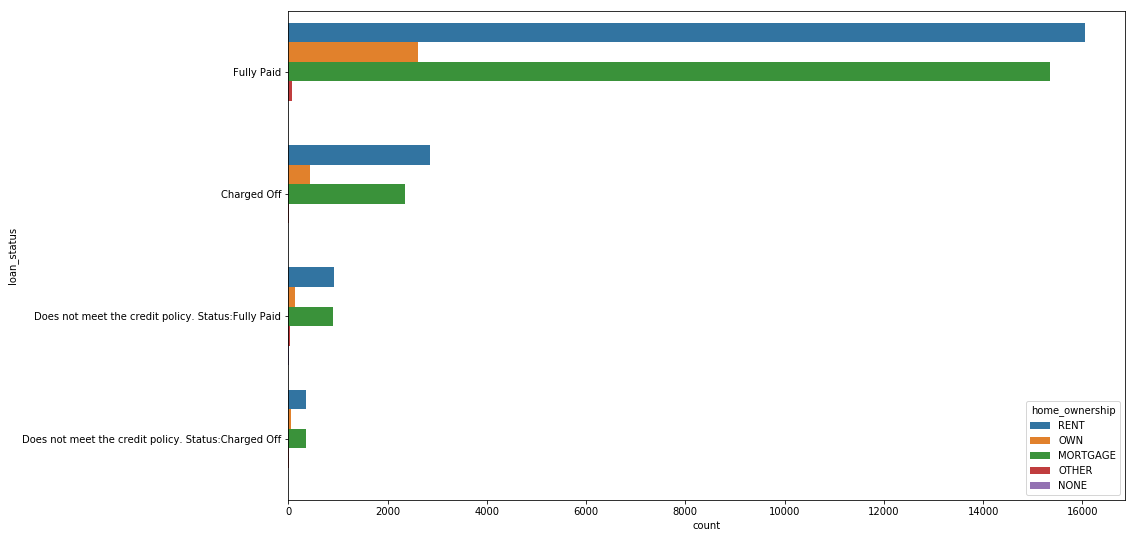

In [15]:
plt.subplots(figsize = (15,9))
sns.countplot(y='loan_status', hue = 'home_ownership' , data=df)

plt.show()

In [25]:
by_loan = df.groupby(['addr_state'], as_index=False).loan_amnt.sum()

In [26]:
by_loan.head()

,addr_state,loan_amnt
0,AK,1110600.0
1,AL,5407875.0
2,AR,2706525.0
3,AZ,10159475.0
4,CA,83825875.0


In [28]:
states = by_loan['addr_state'].values.tolist()
loan_per_state = by_loan['loan_amnt'].values.tolist()

In [32]:
map_plot_data = OrderedDict([('state_codes', states),
                    ('state_loans', loan_per_state)])

In [33]:
new_df = pd.DataFrame.from_dict(map_plot_data)

In [34]:
new_df.head()

,state_codes,state_loans
0,AK,1110600.0
1,AL,5407875.0
2,AR,2706525.0
3,AZ,10159475.0
4,CA,83825875.0


In [35]:
import plotly
import plotly.graph_objs as go

In [39]:
for i in new_df.columns:
    new_df[i]=new_df[i].astype(str)

In [41]:
new_df['txt'] = new_df['state_codes'] + '<br>' + 'Loan Amount: ' + new_df['state_loans']

In [42]:
scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

In [46]:
data_for_plot = [dict(type='choropleth',
                     colorscale = scl,
                     locations = new_df['state_codes'],
                     z=new_df['state_loans'],
                     text = new_df['txt'],
                     marker = dict(
                         line = dict(
                             color = 'rgb(255,255,255)',
                             width = 2)),
                     colorbar= dict(
                         title="USD"))]

In [49]:
layout = dict(
    title = 'Loans Issued Per State',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

In [50]:
fig = dict(data=data_for_plot, layout = layout)

In [56]:
py.iplot(fig, filename='map')
plt.show()

In [60]:
import plotly.plotly as py
import pandas as pd

scl = scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = new_df['state_codes'],
        z = new_df['state_loans'],
        locationmode = 'USA-states',
        text = new_df['txt'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Loan Issued per state <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~tomleeosborn/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'
